In [97]:
import pandas as pd
import numpy as np
from kmodes.kprototypes import KPrototypes 
import support_file as sf
import matplotlib.pyplot as plt
import seaborn as sns
import normalization
from sklearn.preprocessing import StandardScaler

Importing data

In [98]:
data_hot_clustering = sf.data_hot_clustering
#print(data_hot_clustering.head(5))

data_norm = normalization.normalized_dataframe
#print(data_norm.info())

# Clusters are strongly influenced by State group
data_clustering = pd.concat([data_norm,data_hot_clustering["State group"]], axis = 1)

# Standardized data
data_stand = data_hot_clustering[["Avg. Session Length","Time on App","Time on Website","Length of Membership","Yearly Amount Spent","State group"]]

con_feats = ["Avg. Session Length","Time on App","Time on Website","Length of Membership","Yearly Amount Spent"]
scale = StandardScaler()

data_stand[con_feats] = scale.fit_transform(data_stand[con_feats])
print(data_stand.head())




   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0             1.414336     0.636547         2.582317              0.515500   
1            -1.118662    -0.952137         0.253594             -0.936044   
2             1.225459     1.727593        -0.298830             -0.469302   
3             0.797362    -0.009458        -2.562691              1.959165   
4            -1.024748    -0.688189        -0.336661              1.131892   

   Yearly Amount Spent State group  
0             1.105305      MEDIUM  
1            -1.417115         LOW  
2             1.026716         LOW  
3             1.738679        HIGH  
4             0.249935      MEDIUM  


Turning df in numpy array, bc ktypes takes numpy array as input

In [99]:
data_array = data_stand.values
print(data_array)

[[1.414336456362831 0.6365474594878743 2.58231680937881 0.515499881318039
  1.105305408161924 'MEDIUM']
 [-1.118662492423167 -0.952137159924244 0.2535942694734955
  -0.9360443952833016 -1.4171153680727624 'LOW']
 [1.2254586596224701 1.7275933130333037 -0.298829533439401
  -0.46930224929487435 1.0267163020151335 'LOW']
 ...
 [-0.4088061777322479 -0.551471815142565 1.3264318593233695
  1.4114874350360431 0.6371385900674775 'LOW']
 [0.256931661300048 0.3650574766591817 -0.17899661964956778
  -1.2712038225455589 -0.5889901270044431 'MEDIUM']
 [0.6445962887939629 0.3931954458044772 -1.2573335461094681
  -0.8632665639533634 -0.05667299651494911 'HIGH']]


Marking the numerical values (although already float value !! probably not neccessary)

In [100]:
data_array[:,0] = data_array[:,0].astype(float)
data_array[:,1] = data_array[:,1].astype(float)
data_array[:,2] = data_array[:,2].astype(float)
data_array[:,3] = data_array[:,3].astype(float)
data_array[:,4] = data_array[:,4].astype(float)

Choosing optimal number of cluster k

In [101]:
#Choosing optimal K
cost = []
for num_clusters in list(range(1,8)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto.fit_predict(data_array, categorical=[5])
    cost.append(kproto.cost_)

plt.plot(cost)

TypeError: 'list' object is not callable

In [45]:
kproto = KPrototypes(n_clusters=3, max_iter=20)
clusters = kproto.fit_predict(data_array, categorical=[5])

In [46]:
print(kproto.cluster_centroids_)
print(clusters)

[array([[-0.51385219, -0.24243184,  0.2423308 , -0.7761576 , -0.89040117],
       [ 0.10941788,  0.9791354 ,  0.34967435,  0.74979675,  1.09879051],
       [ 0.4771341 , -0.46218517, -0.52236265,  0.28755923,  0.15305866]]), array([['LOW'],
       ['LOW'],
       ['MEDIUM']], dtype='<U6')]
[1 0 1 2 2 1 0 0 0 0 2 1 2 1 0 0 2 1 2 0 2 1 2 2 1 1 2 1 2 1 1 2 0 1 0 0 2
 2 1 2 2 1 2 1 0 1 1 2 2 0 0 1 0 0 0 0 2 1 2 2 2 2 2 2 0 2 1 2 2 0 0 2 0 2
 2 1 0 0 0 0 1 0 2 0 2 2 0 2 1 2 2 1 0 1 0 2 2 2 0 0 0 2 0 2 0 2 0 2 0 1 1
 2 0 2 1 0 2 2 2 0 0 1 0 0 1 2 2 0 2 1 0 0 2 0 0 2 0 1 0 2 1 0 0 0 1 0 1 0
 0 2 1 2 0 0 1 1 0 2 0 2 0 2 1 2 2 2 1 0 0 1 2 1 0 2 2 0 0 1 0 1 0 2 1 0 1
 2 0 0 2 1 2 1 0 1 1 0 0 1 2 2 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 2
 2 2 0 2 2 2 0 0 2 1 0 1 0 2 0 2 1 1 0 0 1 0 1 2 2 1 0 2 0 0 0 1 0 2 0 0 0
 0 0 1 1 2 1 0 2 2 1 0 0 1 2 2 2 0 1 0 0 1 0 0 2 0 1 2 0 1 2 2 0 0 0 0 2 2
 0 2 1 0 2 2 2 1 2 1 2 2 0 1 0 2 2 2 0 2 1 1 2 0 2 1 2 2 0 2 0 0 2 1 1 1 2
 2 2 1 1 1 0 2 0 0 2 1 2 0 2 2 1 0

In [48]:
cluster_list = []
for i in clusters:
    cluster_list.append(i)

Adding clusters to original dataframe 

In [49]:
data_stand["Clusters"] = cluster_list

Analyzing cluster 0

In [91]:
#data_stand[data_stand["Clusters"] == 0].head(10)
#data_stand[data_stand["Clusters"] == 0].describe()

cluster_0 = data_stand[data_stand["Clusters"] == 0]
#print(cluster_0.head(5))

indices_cluster_0 = cluster_0.index
#print(indices_cluster_0)

cluster_0_df = []

for i in indices_cluster_0:
    cluster_0_df.append(data_hot_clustering.iloc[i])

#print(cluster_0_df)

cluster_0_df = pd.DataFrame(cluster_0_df)

#print(cluster_0_df.head())
#print(cluster_0_df.describe())

       Avg. Session Length  Time on App  Time on Website  \
count           151.000000   151.000000       151.000000   
mean             32.540155    11.800183        37.257792   
std               0.943752     0.843347         0.917493   
min              29.532429     8.508152        34.779751   
25%              31.879979    11.229980        36.615578   
50%              32.529769    11.810587        37.266878   
75%              33.264097    12.356123        37.846217   
max              34.606242    13.664748        39.294043   

       Length of Membership  Yearly Amount Spent        HIGH         LOW  \
count            151.000000           151.000000  151.000000  151.000000   
mean               2.820291           433.079264    0.311258    0.417219   
std                0.782750            47.923987    0.464549    0.494741   
min                0.269901           275.918421    0.000000    0.000000   
25%                2.348786           407.730605    0.000000    0.000000   
50%

Analyzing cluster 1

In [88]:
cluster_1 = data_stand[data_stand["Clusters"] == 1]
#print(cluster_1.head(5))

indices_cluster_1 = cluster_1.index
#print(indices_cluster_1)

cluster_1_df = []

for i in indices_cluster_1:
    cluster_1_df.append(data_hot_clustering.iloc[i])

#print(cluster_1_df)

cluster_1_df = pd.DataFrame(cluster_1_df)

#print(cluster_1_df.head())
#print(cluster_1_df.describe())

       Avg. Session Length  Time on App  Time on Website  \
count           103.000000   103.000000       103.000000   
mean             33.172774    12.989076        37.364213   
std               0.923998     0.742110         0.895099   
min              31.283447    11.236507        35.539142   
25%              32.435304    12.505873        36.746940   
50%              33.155700    12.965761        37.292045   
75%              33.793582    13.439884        37.911449   
max              35.630854    15.126994        39.672591   

       Length of Membership  Yearly Amount Spent        HIGH         LOW  \
count            103.000000           103.000000  103.000000  103.000000   
mean               4.311598           587.445482    0.339806    0.427184   
std                0.787608            53.551999    0.475959    0.497088   
min                2.871948           501.122492    0.000000    0.000000   
25%                3.765316           543.874719    0.000000    0.000000   
50%

Analyzing cluster 2

In [89]:
cluster_2 = data_stand[data_stand["Clusters"] == 2]
#print(cluster_2.head(5))

indices_cluster_2 = cluster_2.index
#print(indices_cluster_2)

cluster_2_df = []

for i in indices_cluster_2:
    cluster_2_df.append(data_hot_clustering.iloc[i])

#print(cluster_2_df)

cluster_2_df = pd.DataFrame(cluster_2_df)

#print(cluster_2_df.head())
#print(cluster_2_df.describe())


       Avg. Session Length  Time on App  Time on Website  \
count           139.000000   139.000000       139.000000   
mean             33.546007    11.586307        36.499671   
std               0.889744     0.758198         0.932153   
min              31.736636     9.477778        34.476878   
25%              32.879654    11.084472        35.854137   
50%              33.485520    11.634893        36.494406   
75%              34.157073    12.018974        37.069242   
max              36.139662    13.685119        38.918749   

       Length of Membership  Yearly Amount Spent        HIGH         LOW  \
count            139.000000           139.000000  139.000000  139.000000   
mean               3.859855           514.054340    0.323741    0.287770   
std                0.696847            41.723570    0.469595    0.454361   
min                2.117383           393.857371    0.000000    0.000000   
25%                3.379257           489.563079    0.000000    0.000000   
50%

Visualizing clusters

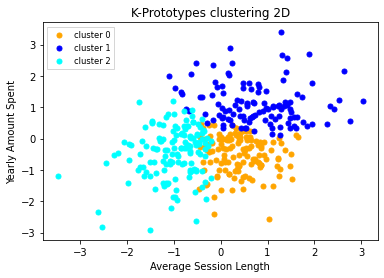

In [73]:
x = data_stand.iloc[:,[0,4,5]].values


kproto = KPrototypes(n_clusters=3)
clusters = kproto.fit_predict(x, categorical=[2])


plt.scatter(x[clusters == 0, 0], x[clusters == 0, 1], s = 25, c = 'orange', label="cluster 0")
plt.scatter(x[clusters == 1, 0], x[clusters == 1, 1], s = 25, c = "blue", label="cluster 1")
plt.scatter(x[clusters == 2, 0], x[clusters == 2, 1], s = 25, c = 'cyan', label="cluster 2")
plt.xlabel("Average Session Length")
plt.ylabel("Yearly Amount Spent")
plt.title('K-Prototypes clustering 2D' )
plt.legend(fancybox=False, fontsize='small')
plt.show()